In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("../Dataset/ML/train_transaction.csv", usecols = range(60))
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0.5, 1.0, 'Distribución de los costos\npor transacción según fraude'),
 Text(0, 0.5, 'Costo por transacción'),
 Text(0.5, 0, 'Fue fraude'),
 [Text(0, 0, 'No'), Text(1, 0, 'Sí')]]

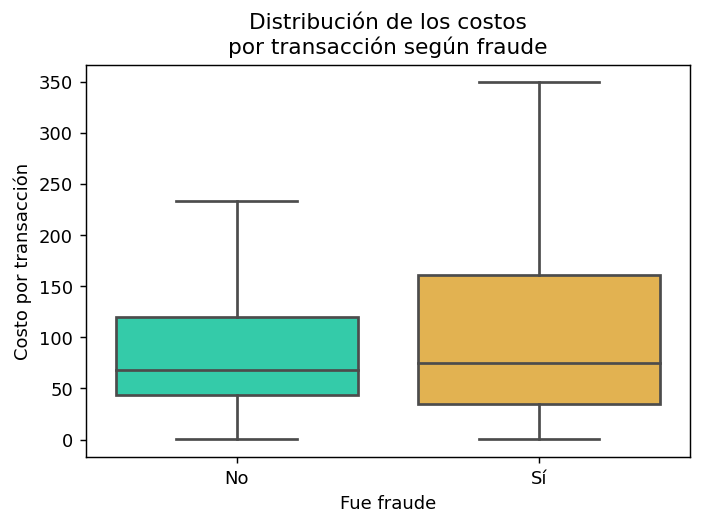

In [40]:
plt.subplots(dpi = 130)
ax = sns.boxplot(data = df[["TransactionAmt", "isFraud"]], x = "isFraud", y = "TransactionAmt", showfliers = False, palette = "turbo")
ax.set(title = "Distribución de los costos\npor transacción según fraude", ylabel = "Costo por transacción", xlabel = "Fue fraude", xticklabels = ["No", "Sí"])
# Distribucion de los costos por transaccion segun fraude

In [4]:
gb = df.groupby(["card6", "isFraud"]).agg({"TransactionID": "count"}).reset_index()
gb.head()

,card6,isFraud,TransactionID
0,charge card,0,15
1,credit,0,139036
2,credit,1,9950
3,debit,0,429264
4,debit,1,10674


<AxesSubplot:xlabel='card6', ylabel='TransactionID'>

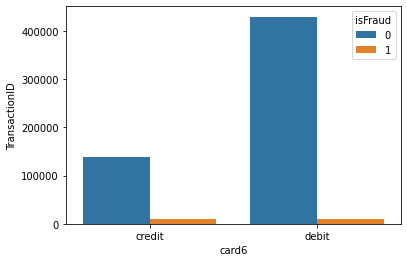

In [5]:
sns.barplot(data = gb[gb["card6"].isin(["debit", "credit"])], x = "card6", y = "TransactionID", hue = "isFraud")

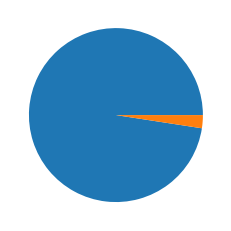

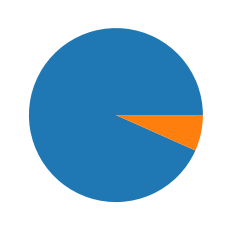

In [6]:
plt.figure(0)
plt.pie(data = gb[gb["card6"] == "debit"], x = "TransactionID")
plt.figure(1)
plt.pie(data = gb[gb["card6"] == "credit"], x = "TransactionID")
plt.show()

In [7]:
gb = df.groupby("P_emaildomain").agg({"isFraud": ["count", "sum"]}).reset_index()
gb["porcentaje"] = gb["isFraud"]["sum"] / gb["isFraud"]["count"]
gb.head()

P_emaildomain isFraud      porcentaje
                   count  sum           
0        aim.com     315   40   0.126984
1  anonymous.com   36998  859   0.023217
2        aol.com   28289  617   0.021811
3        att.net    4033   30   0.007439
4  bellsouth.net    1909   53   0.027763

[Text(0.5, 1.0, 'Top 5 dominios de mail\ncon mayor porcentaje de fraudes'),
 Text(0.5, 0, 'Dominio de mail'),
 Text(0, 0.5, 'Porcentaje de fraudes')]

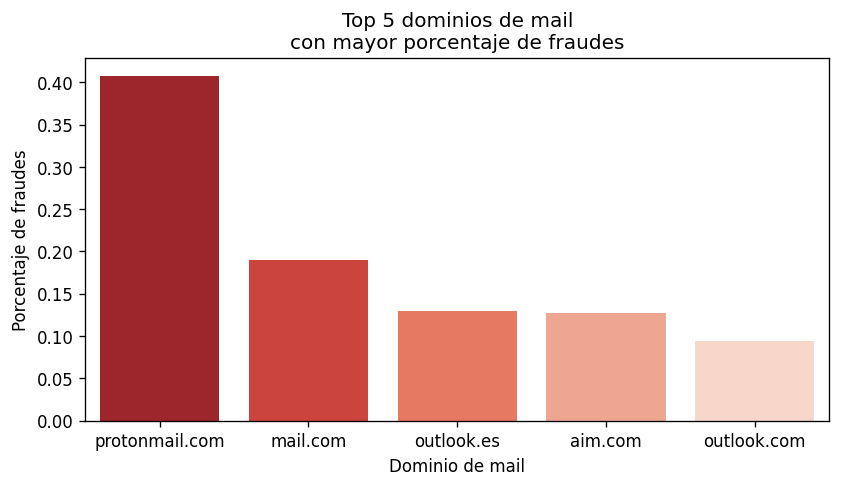

In [23]:
plt.subplots(dpi = 120, figsize = (8,4))
ax = sns.barplot(data = gb.nlargest(5, "porcentaje"), x = "P_emaildomain", y = "porcentaje", palette = "Reds_r")
ax.set(title = "Top 5 dominios de mail\ncon mayor porcentaje de fraudes", xlabel = "Dominio de mail", ylabel = "Porcentaje de fraudes")

In [24]:
gb = df.groupby(["card4", "ProductCD"]).agg({"isFraud": ["sum", "count"]}).reset_index()
gb.columns =  ["card4", "ProductCD", "sum", "count"]
gb["porcentaje"] = gb["sum"] / gb["count"]
gb.head()

,card4,ProductCD,sum,count,porcentaje
0,american express,C,2,2,1.000000
1,american express,H,91,1566,0.058110
2,american express,R,111,6138,0.018084
3,american express,S,35,622,0.056270
4,discover,H,45,603,0.074627


[Text(0.5, 1.0, 'Cantidad de fraudes según\ntipo de tarjeta y tipo de producto'),
 Text(0.5, 20.72222222222222, 'Tipo de producto'),
 Text(45.72222222222221, 0.5, 'Tipo de tarjeta')]

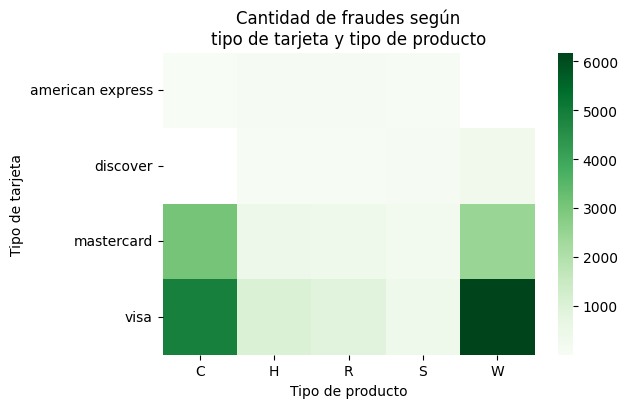

In [44]:
plt.subplots(dpi = 100)
ax = sns.heatmap(data = gb.pivot("card4", "ProductCD", "sum"), cmap = "Greens")
ax.set(title = "Cantidad de fraudes según\ntipo de tarjeta y tipo de producto", xlabel = "Tipo de producto", ylabel = "Tipo de tarjeta")

[Text(0.5, 1.0, 'Distribución de D2 según fraude'),
 Text(0.5, 0, 'Fue fraude'),
 [Text(0, 0, 'No'), Text(1, 0, 'Sí')]]

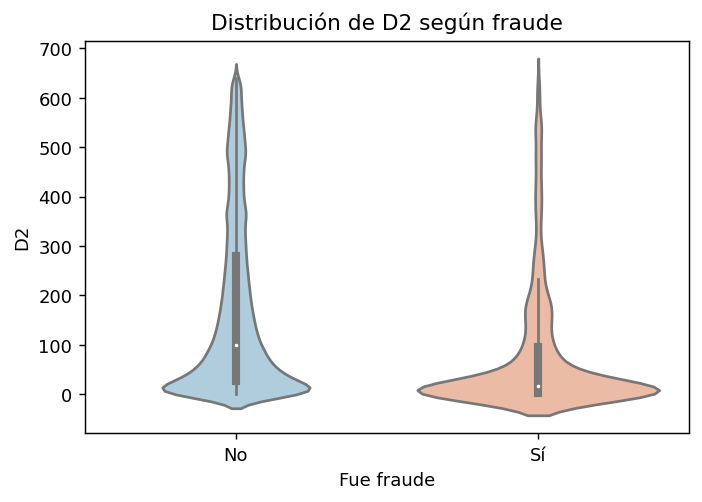

In [26]:
campo = "D2"
plt.subplots(dpi = 130)
ax = sns.violinplot(data = df[[campo, "isFraud"]], x = "isFraud", y = campo, palette = "RdBu_r")
ax.set(title = "Distribución del campo D2 según fraude", xlabel = "Fue fraude", xticklabels = ["No", "Sí"])